1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# 데이터 확인
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data' 
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
df = pd.read_csv(url, names=columns)

In [23]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# 레이블 준비 

Text(0.5, 1.0, 'Label')

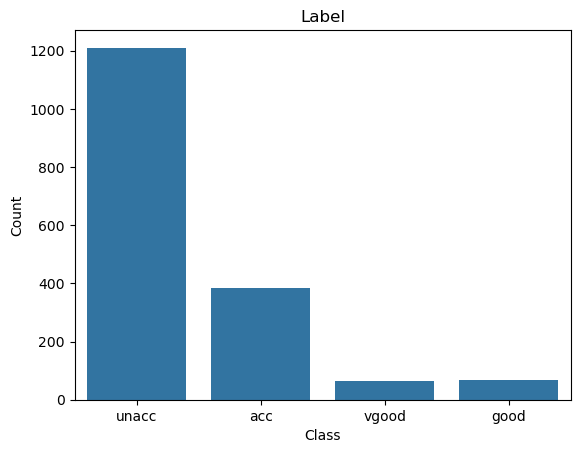

In [24]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [25]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts() 

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

# 결측치 확인

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# 데이터 준비

In [26]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


# 칼럼 문자 => 라벨 인코딩

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['buying'] = label_encoder.fit_transform(df['buying'])
df['buying'].value_counts().sort_index()

df['maint'] = label_encoder.fit_transform(df['maint'])
df['maint'].value_counts().sort_index()

df['doors'] = label_encoder.fit_transform(df['doors'])
df['doors'].value_counts().sort_index()

df['persons'] = label_encoder.fit_transform(df['persons'])
df['persons'].value_counts().sort_index()

df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['lug_boot'].value_counts().sort_index()

df['safety'] = label_encoder.fit_transform(df['safety'])
df['safety'].value_counts().sort_index()

safety
0    576
1    576
2    576
Name: count, dtype: int64

## 레이블 준비

In [42]:
y = df['class']
y = label_encoder.fit_transform(y)
y


array([2, 2, 2, ..., 2, 1, 3])

## 훈련 데이터 준비

In [34]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


# 딥러닝 입력을 위해 X를 Numpy로 변환

In [35]:
X = X.values
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [46]:
X.shape, y.shape

((1728, 6), (1728,))

## 입력, 출력 차원 분석

In [38]:
input_dim, output = X.shape[1], y.shape[1] #특징 개수, 분류 클래스 개수 
input_dim, output

(6, 4)

# 2. 모델 구축(RF, LR, DT)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. 로지스틱 회귀(Logistic Regression)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
clf_lr = LogisticRegression(random_state=0) 
clf_lr.fit(X_train, y_train) 

y_pred = clf_lr.predict(X_test) # 예측값 

print ("\n--- Logistic Regression Classifier ---")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


--- Logistic Regression Classifier ---
              precision    recall  f1-score   support

           0       0.26      0.11      0.16        79
           1       0.00      0.00      0.00        17
           2       0.71      0.89      0.79       240
           3       0.22      0.20      0.21        10

    accuracy                           0.65       346
   macro avg       0.30      0.30      0.29       346
weighted avg       0.56      0.65      0.59       346

[[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]


C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2. 결정 트리(Decision Tree)

In [64]:
clf_dt = DecisionTreeClassifier(random_state=0) 
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test) # 예측값 

print("\n Decision Tree Classifier ---") 
print(classification_report(y_test,pred_dt))
print(confusion_matrix(y_test, pred_dt)) 


 Decision Tree Classifier ---
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        79
           1       0.81      1.00      0.89        17
           2       0.98      0.99      0.99       240
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346

[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


# 5. 랜덤 포레스트(Random Forest)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print(classification_report(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.76      0.76      0.76        17
           2       1.00      1.00      1.00       240
           3       0.75      0.90      0.82        10

    accuracy                           0.97       346
   macro avg       0.86      0.90      0.88       346
weighted avg       0.97      0.97      0.97       346

[[ 73   4   1   1]
 [  2  13   0   2]
 [  1   0 239   0]
 [  1   0   0   9]]
